In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

In [44]:
arquivo = pd.read_csv('/content/drive/MyDrive/grafo.csv', delimiter=',')

In [45]:
arquivo

,Vi,Vj
0,A,C
1,B,A
2,C,B
3,C,D
4,D,B


In [46]:
G = nx.DiGraph()

$G = (V, E)$

$V =$ conjunto de vértices

$E =$ conjunto de arestas

In [47]:
V = set(arquivo['Vi'])
vi = list(arquivo['Vi'])
vj = list(arquivo['Vj'])

In [48]:
E = [(vi[k], vj[k]) for k in range(len(vi))]

In [49]:
G.add_nodes_from(V)
G.add_edges_from(E)

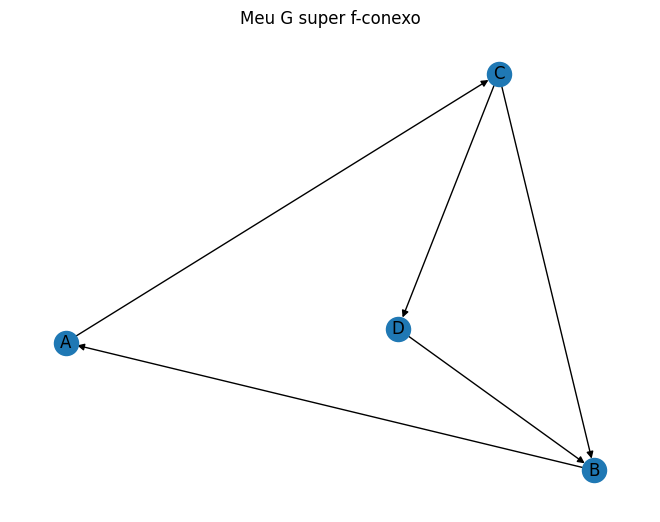

In [50]:
nx.draw(G, with_labels=True)
plt.title("Meu G super f-conexo")
plt.show()

Explorando propriedades do Grafo, tais como fecho transitivo direto e inverso

In [51]:
print(G)

DiGraph with 4 nodes and 5 edges


In [52]:
G.degree(["A", "B"])

DiDegreeView({'A': 2, 'B': 3})

In [68]:
list(G.adj["C"])

['B', 'D']

In [54]:
V = set(G.nodes)

In [55]:
E = set(G.edges)

In [190]:
def Nplus(G, vertices):
    Np = set()

    for v in vertices:
        corrente = set(G.neighbors(v)).union({v})
        Np = Np.union(corrente)

    return Np

def Nminus(G, vertices):
    Nm = set()

    for v in vertices:
        predecessores = set(pred for pred in G.predecessors(v))
        Nm = Nm.union(predecessores)

    return Nm

**Algoritmos F-conexos**

In [200]:
def kosaraju(graph):
    # Step 1: Compute the reverse graph
    reversed_graph = graph.reverse()

    # Step 2: First DFS to compute finishing times
    visited = set()
    finishing_times = []

    def dfs1(node):
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                dfs1(neighbor)
        finishing_times.append(node)

    for node in graph.nodes():
        if node not in visited:
            dfs1(node)

    # Step 3: Second DFS to find strongly connected components
    visited.clear()
    strongly_connected_components = []

    def dfs2(node, component):
        visited.add(node)
        component.add(node)
        for neighbor in reversed_graph.neighbors(node):
            if neighbor not in visited:
                dfs2(neighbor, component)

    while finishing_times:
        node = finishing_times.pop()
        if node not in visited:
            component = set()
            dfs2(node, component)
            strongly_connected_components.append(component)

    return strongly_connected_components

In [177]:
aula = nx.DiGraph()
aula.add_nodes_from([i for i in range(1, 8)])
aula.add_edges_from([
    (1, 2),
    (1, 3),
    (2, 6),
    (2, 4),
    (3, 4),
    (4, 3),
    (5, 1),
    (5, 2),
    (6, 5),
    (7, 5),
    (7, 8),
    (8, 6),
    (8, 7)
])

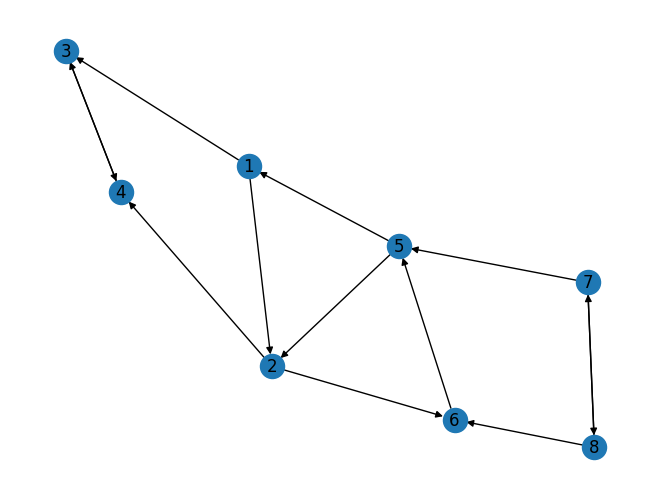

In [180]:
nx.draw(aula, with_labels = True)

In [182]:
scn = nx.strongly_connected_components(aula)

In [184]:
print(list(scn))

[{3, 4}, {1, 2, 5, 6}, {8, 7}]


[{7, 8}, {1, 2, 5, 6}, {3, 4}]